# Práctica - Redes Neuronales con Keras
## ¿Qué es Keras?
KERAS es una librería diseñada por el francés François Chollet, ingeniero de Google, que permite diseñar de manera sencilla una amplia gama de arquitecturas de redes neuronales basadas en los recientes avances en el campo de deep learning. KERAS se apoya en otras librerías de diseño de redes neuronales, como TensorFlow o Theano, pero su diferencia radica en la facilidad para el usuario de utilizar KERAS en comparación con las otras. Dicho de otro modo, KERAS permite de una manera sencilla y amigable para el usuario, utilizar librerías potentes en el ámbito del deep learning. Esta facilidad viene de la mano de un diseño modular. Como veremos, KERAS define las capas como objetos con ciertas propiedades y por tanto una red se construye como una secuencia de objetos o capas. Además, KERAS permite implementar de manera sencilla los avances de deep learning: redes convolucionales, redes recurrentes,funciones de activación ReLu, stochastic gradient descent …

Las ventajas de KERAS se resumen en:

* El código se puede correr tanto en la CPU como en GPU.
* Permite implementar de manera sencilla y rápida estructuras de deep learning gracias a su estructura secuencial de capas.
* Se apoya en librerías de deep learning: TensorFlow, CNTK y Theano.

## ¿Cómo instalar Keras?

`mamba create --name tensorflow python=3.8`

`pip install tensorflow`

## ¿Cómo construir una red neuronal con Keras?
Para guiarnos durante la elaboración de nuestra primera red neuronal en KERAS vamos a usar el dataset MNIST. Recordamos que el MNIST cuenta con 70.000 imágenes 28x28 pixeles, siendo 60.000 para entrenar y 10.000 utilizadas como test. La librería KERAS ya cuenta internamente con el dataset MNIST por lo que no es necesario descargarlo de cualquier otro repositorio de datos como Kaggle. Por tanto, para cargar los datos mediante KERAS:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import keras
from keras.utils import to_categorical
from keras import layers

In [9]:
from tensorflow.keras import regularizers

In [10]:
import tensorflow.keras as tk
from plot_keras_history import show_history, plot_history

In [11]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

In [12]:
np.shape(x_train)

(60000, 28, 28)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

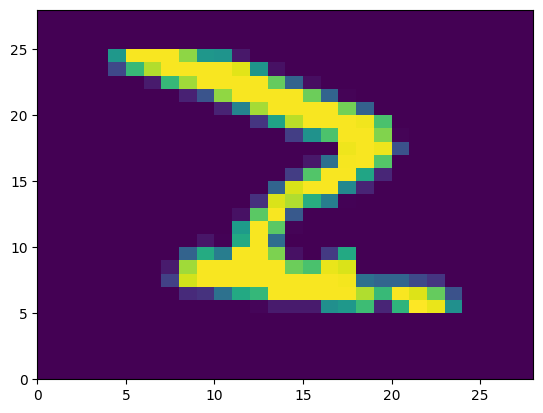

In [15]:
plt.pcolormesh(x_train[0,:,:])

Observamos como el x_train es una array de 3 dimensiones, donde la primera dimensión es la observación/imagen y las 2 siguientes la posición del pixel. Ahora bien, para tener la estructura de las redes neuronales vistas hasta ahora, los predictores (o pixeles en este caso) representan una única capa y por tanto es más adecuado concatenar los predictores, recreando la estructura de capa de entrada de una red neuronal tradicional.

In [16]:
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape(x_test.shape[0], 784)
np.shape(x_train)

(60000, 784)

El resultado de la concatenación es esta vez una matrix de dos dimensiones, donde la primera dimensión representa la observación/imagen y la siguiente los 28 * 28 = 784 pixeles. Por otra parte, también hay que reescalar los datos para que no haya problemas de escala entre predictores:

In [17]:
x_train = x_train / 255
x_test = x_test / 255

Una vez preprocesada la capa de entrada, constituida por x_train o x_test, hay que darle a y_train/y_test la estructura de capa de salida que deseemos. Es decir, la pregunta que debemos hacernos es, ¿cuántas neuronas de salida va a tener mi red? Una manera de abordar el problema (y la que se usa en la actualidad) es introducir tantas neuronas de salida como clases a identificar. En este caso pretendemos identificar 10 clases: si el número es un 0, o un 1, o un 2, …. o un 9. Por tanto, tendremos 10 neuronas en la capa de salida, siendo cada una de ellas la responsable de identificar una de las 10 clases en concreto. Por ejemplo: la neurona de salida número 1 es la encargada de identificar si el número que “ve” la red es un 0 o no lo es; la neurona de salida número 2 es la encargada de identificar si el número que “ve” la red es un 1 o no lo es, …, y así sucesivamente hasta 10 neuronas.

Para que nuestros datos tengan estructura de 10 neuronas ocultas hay que redimensionar nuestros datos de manera que se convierta en una matriz de dos dimensiones: donde la primera dimensión es la observación y la segunda la neurona oculta. Afortunadamente, KERAS tiene predefinida esta función que es capaz de redimensionar los datos por categorías.

In [18]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
y_train [0:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Podemos ver como la primera imagen que era un número 5, se ha convertido a binario: ahora es un 1 en la columna 6 (es decir, la sexta neurona oculta) y 0 en las demás (ya que no es ningún otro número que no sea un 6).

Una vez que ya están preparados los datasets, podemos proceder a construir nuestro modelo. La construcción de un modelo mediante esta librería se estructura en una serie de pasos:

* Definimos como va a interactuar el usuario con KERAS: de manera secuencial o de manera funcional: En el primer caso la red es una secuencia lineal de capas, mientras que el segundo caso permite una elaboración de redes con topologías más complejas (como por ejemplo redes cícliclas) [link](https://www.youtube.com/watch?v=Hj1-9Oi9ZjE). En este curso tan solo vamos a ver la manera secuencial de interactuar con KERAS.
* Definimos la estructura de la red: tipo de capa (dense, convolutional, …), número de capas, número de neuronas ocultas, función de activación, penalización de los pesos …
* Compilamos el modelo: en esta parte se introduce la función de coste a minimizar, el algoritmo de aprendizaje (backpropagation, backpropagation + momentum, …).
* Se ajusta el modelo, es decir se entrena. KERAS proporciona herramientas de visualización del error de ajuste.
De acuerdo con estos pasos vamos a elaborar una red neuronal de dos capas con función de activación sigmoidal tanto en las capas ocultas como en la capa de salida.

**Paso 1.** Definir nuestro modelo como una estructura secuencial.

In [21]:
model1 = keras.Sequential()

**Paso 2.** Definimos la topología de la red neuronal.

In [22]:
model1.add(layers.Dense(units = 100, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model1.add(layers.Dense(units = 100, activation = "sigmoid")) # Segunda capa oculta
model1.add(layers.Dense(units = 10 , activation = "sigmoid"))

/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print('N parametros: ' + str((784*100 + 100) + (100*100 + 100) + (100*10 +10)))

N parametros: 89610


Podemos observar como hemos definido una red con 3 capas (la capa de entrada no cuenta como capa), teniendo las 2 capas ocultas 100 neuronas ocultas y la última capa es la de salida con 10 neuronas ocultas.

**Paso 3.** Definir cómo va a aprender la red: algoritmo de aprendizaje y función a minimizar. KERAS ya tiene incluidos una gran variedad de algoritmos de aprendizaje (“rmsprop” or “adagrad”, “backpropagation”, …), así como funciones objetivo (“mean square error”, “root mean square error”, …). Más información sobre los distintos tipos de algoritmos de aprendizaje y de las funciones objetivo prediseñadas que tiene KERAS se pueden encontrar en el siguiente link: [https://keras.io/api/] . Nosotros en este caso vamos a entrenar utilizando lo visto hasta ahora: minimizar el mean square error mediante gradient descent utilizando el algoritmo de backpropagation.

In [25]:
model1.compile(
  optimizer = keras.optimizers.SGD(0.1), # Stochastic Gradient Descent (SGD) con un learning rate de 0.1
  # optimizer = keras.optimizers.SGD(0.1, momentum = 0.01), # Con momento
  # Una de las ventajas del optimizador SGD es que en cada iteración se utiliza un subgrupo de muestras diferente lo que evita caer en mínimos locales
  loss = "mse",
  metrics = ["accuracy"]
)

**Paso 4.** Entrenar el modelo.

In [ ]:
history = model1.fit(x_train[0:5000,:], y_train[0:5000,:], epochs = 1000, batch_size = 100) # 5000 neurons
# Con el SGD en cada iteración se utilizan 100 imágenes (batch_size).
# Por lo tanto para una época habrá 600 iteraciones 60000/100 y se ajustarían los pesos 600 
# veces en cada iteración

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.1102 - loss: 0.2319
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.1105 - loss: 0.1010
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.0931 - loss: 0.0928
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.1062 - loss: 0.0910
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.1449 - loss: 0.0904
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.1571 - loss: 0.0901
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.1632 - loss: 0.0900
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.1534 - loss: 0.0899
Epoch 9/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.1475 - loss: 0.0899
Epoch 10/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1523 - loss: 0.0898
Epoch 11/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.1529 - loss: 0.0898
Epoch 12/1000
50/50 ━━━━━━━━━━━━

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

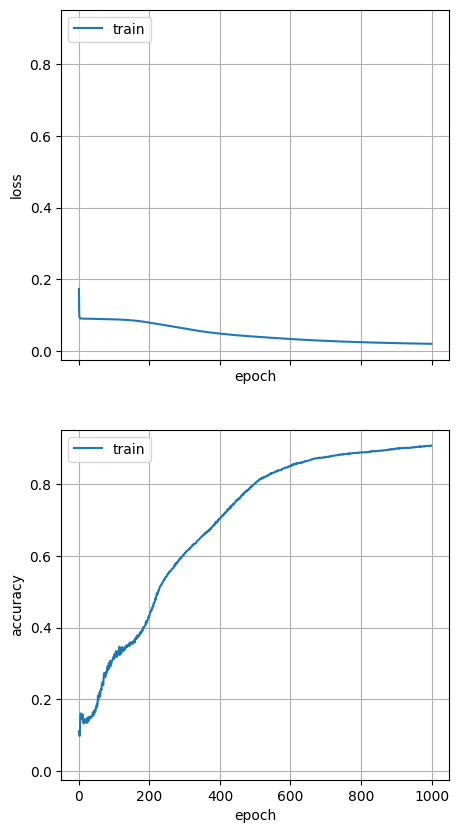

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
ax2.grid(True)

En la figura anterior podemos ver la evolución del error (en este caso el mean square error) y la evolución de la métrica (en este caso el accuracy), por época. Se observa como el error disminuye en cada época y el accuracy aumenta, como es de esperar.

Para evaluar nuestro modelo en un conjunto nuevo de datos se utiliza la manera tradicional, es decir, utilizando la función predict.

In [29]:
# Devuelve la probabilidad para cada una de las clases
pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step


In [30]:
# Seleccionamos la posición de la que tiene más probabilidad
clases_predichas = np.argmax(pred, axis=1)
clases_predichas

array([7, 2, 1, ..., 4, 8, 6])

In [31]:
# Devuelve el valor del error y de la métrica (función objetivo) en el nuevo dataset.
m_eval = model1.evaluate(x_test, y_test, batch_size=100)
m_eval

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8685 - loss: 0.0243


[0.021717457100749016, 0.8859000205993652]

## ¿Cómo saber si nuestra red sobreajusta?
El gran número de parámetros a ajustar en una red neuronal las hace propensas a sobreajustar si el número de datos no es suficiente. Además, mediante gradient descent nos movemos en la dirección que minimiza el error en los datos de train pero que no tiene por qué ser la misma dirección que en otra muestra de la misma población. Para controlar si el error difiere entre distintas muestras de la misma población, se suele dividir el dataset de train en un dataset A, que es el que se utiliza para entrenar, y un dataset B, que es el que se usa como dataset de control. Para controlar esta divergencia en los errores se dibuja el error estimado por época, de manera que se pueda observar en qué momento del aprendizaje la red empieza a ajustar. La separación del dataset de train en dos (A y B) se puede realizar directamente a la hora de ajustar el modelo.

In [32]:
model2 = keras.Sequential()
model2.add(layers.Dense(units = 100, input_dim = 784, activation = "sigmoid")) # Primera capa oculta
model2.add(layers.Dense(units = 100, activation = "sigmoid")) # Segunda capa oculta
model2.add(layers.Dense(units = 10 , activation = "sigmoid"))

model2.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history = model2.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_split = 0.2)
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# The model will set apart this fraction of the training data, will not train on it, 
# and will evaluate the loss and any model metrics on this data at the end of each epoch. 
# The validation data is selected from the last samples in the x and y data provided, before shuffling.
#show_history(history.history,
#            show_standard_deviation=False,
#            show_average=True)

Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.1069 - loss: 0.1301 - val_accuracy: 0.1068 - val_loss: 0.0898
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.1157 - loss: 0.0898 - val_accuracy: 0.1102 - val_loss: 0.0897
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.1284 - loss: 0.0896 - val_accuracy: 0.1194 - val_loss: 0.0895
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.1369 - loss: 0.0894 - val_accuracy: 0.1516 - val_loss: 0.0893
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.1706 - loss: 0.0892 - val_accuracy: 0.1708 - val_loss: 0.0891
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.1814 - loss: 0.0890 - val_accuracy: 0.1867 - val_loss: 0.0889
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.1983 - loss: 0.0888 - val_accuracy: 0.1948 - val_loss: 0.0887
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.2032 - loss: 0

In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

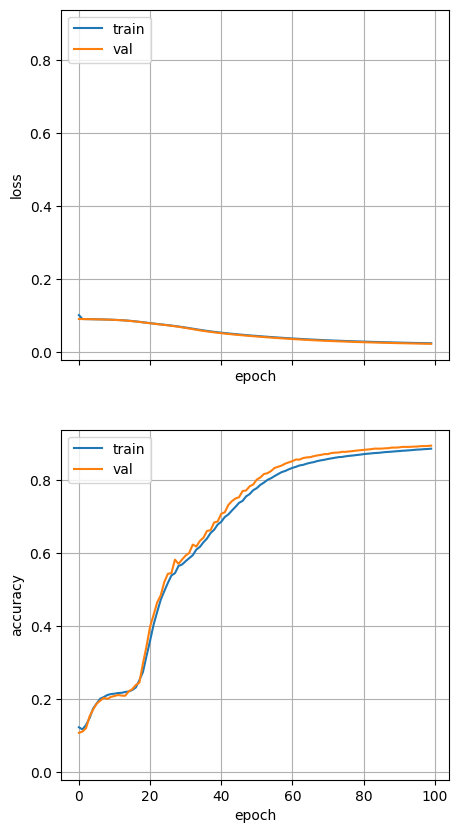

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

## ¿Cómo obtener información sobre el modelo inferido?
Aparte de calcular las predicciones, uno puede querer saber cuales han sido los valores de los coeficientes estimados así como los gradientes. Una situación en la que uno puede estar interesado en esta información es, por ejemplo, cuando regulariza el modelo mediante la norma L1. Recordamos que este tipo de regularización hace 0 algunos de los coeficientes, generalmente aquellos que conectan con neuronas irrelevantes para la predicción en cuestión, limitando la complejidad del modelo. Puede ser interesante, en el caso de las imágenes, ver que pixeles son los más relevantes a la hora de determinar qué número infiere el modelo que está viendo. Por ello, en esta sección vamos a: 
1) Aprender a introducir este tipo de penalización en las redes neuronales mediante KERAS 
2) Aprender a obtener los coeficientes del modelo.

Para introducir este tipo de penalización hay que especificarlo a la hora de definir la topología de la red neuronal. Para ver la penalización sobre el campo original (capa de entrada), vamos a realizar una regresión lineal.

In [35]:
# Regularizacion L1
model3 = keras.Sequential() 
model3.add(layers.Dense(units = 10, input_dim = 784, activation = "sigmoid", 
                        kernel_regularizer = regularizers.L1(0.0001)))

model3.compile(
  optimizer = keras.optimizers.SGD(0.1, momentum = 0.5),
  loss = "mse",
  metrics = ["accuracy"]
)

history3 = model3.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_split = 0.2)

# Regularizacion L2
model4 = keras.Sequential() 
model4.add(layers.Dense(units = 10, input_dim = 784, activation = "sigmoid", 
                        kernel_regularizer = regularizers.L2(0.0001)))

model4.compile(
  optimizer = keras.optimizers.SGD(0.1, momentum = 0.5),
  loss = "mse",
  metrics = ["accuracy"]
)

history4 = model4.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_split = 0.2)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4710 - loss: 0.1239 - val_accuracy: 0.7814 - val_loss: 0.0818
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7885 - loss: 0.0794 - val_accuracy: 0.8454 - val_loss: 0.0687
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8348 - loss: 0.0688 - val_accuracy: 0.8577 - val_loss: 0.0618
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8460 - loss: 0.0627 - val_accuracy: 0.8668 - val_loss: 0.0572
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8564 - loss: 0.0582 - val_accuracy: 0.8688 - val_loss: 0.0539
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8574 - loss: 0.0553 - val_accuracy: 0.8720 - val_loss: 0.0515
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8605 - loss: 0.0530 - val_accuracy: 0.8742 - val_loss: 0.0497
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8587 - loss: 0.0517 - 

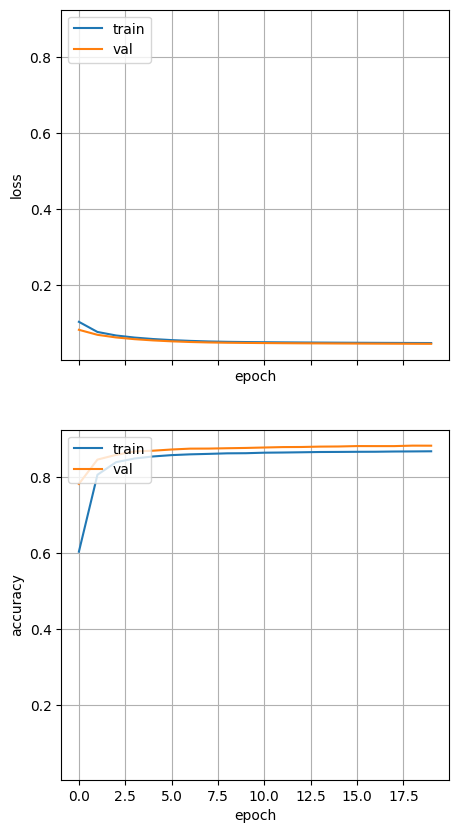

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history3.history['loss'])
ax1.plot(history3.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history3.history['accuracy'])
ax2.plot(history3.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

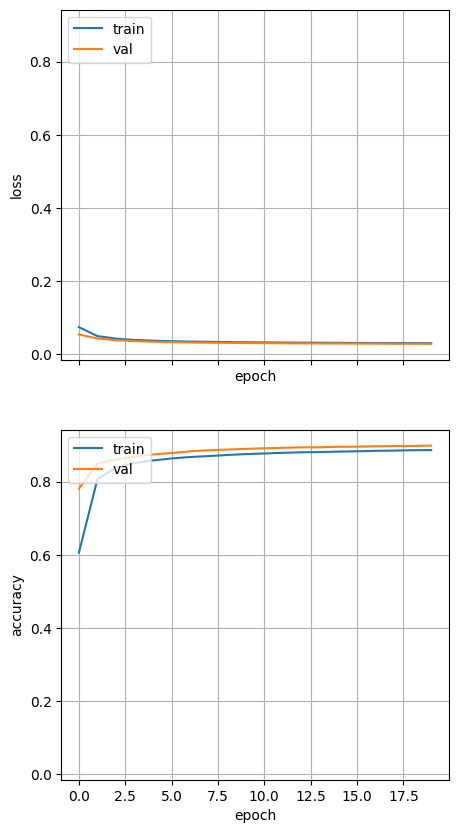

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize = (5, 10))

ax1.plot(history4.history['loss'])
ax1.plot(history4.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history4.history['accuracy'])
ax2.plot(history4.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

Para ver qué coeficientes ha estimado se hace lo siguiente:

In [38]:
weightsL1 = model3.get_weights()[0]
biasL1 = model3.get_weights()[1]

weightsL2 = model4.get_weights()[0]
biasL2 = model4.get_weights()[1]

In [39]:
np.min(weightsL2)

np.float32(-0.39952454)

Podemos visualizar los pesos:

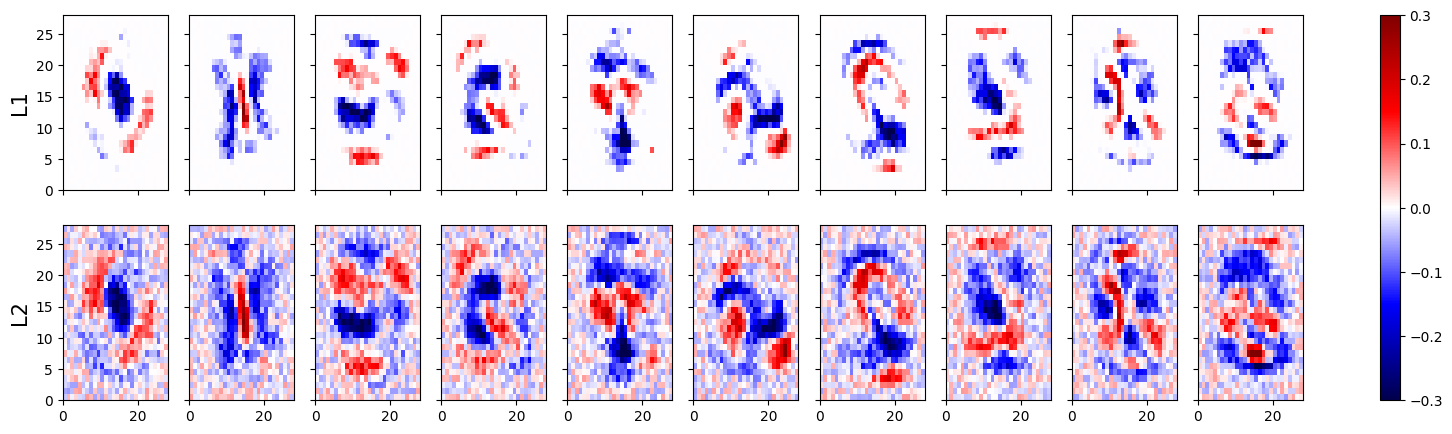

In [41]:
weightsL1 = weightsL1.reshape((28, 28, 10))
weightsL2 = weightsL2.reshape((28, 28, 10))
fig, axs = plt.subplots(2, 10, figsize = (20, 5), sharex=True, sharey=True)
vmin = -0.3; vmax = 0.3

for i in range(10):
    a = axs[0, i].pcolormesh(weightsL1[:,:,i], vmin = vmin, vmax = vmax, cmap = 'seismic')
    axs[1, i].pcolormesh(weightsL2[:,:,i], vmin = vmin, vmax = vmax, cmap = 'seismic')

axs[0, 0].set_ylabel('L1', fontsize = 15)
axs[1, 0].set_ylabel('L2', fontsize = 15)

fig.colorbar(a, ax=axs, location='right')

## ¿Cuál es el beneficio entre usar KERAS y una librería más tradicional de redes neuronales?
Aparte de los beneficios relacionados con las técnicas de deep learning que son accesibles mediante la librería KERAS, hay otro beneficio importante con respecto a las librerías tradicionales: la velocidad de computo. En anteriores prácticas vimos como diseñar redes neuronales mediante la librería RSNNS. En esta sección vamos a comparar la velocidad de realizar una época para una misma configuración (número de capas y de neuronas) en ambas librerías.

In [42]:
library(RSNNS)

timeRSNNS_begin <- Sys.time() 
model_RSNNS <- mlp(x_train,y_train, linOut = FALSE,
                   learnFunc = "Std_Backpropagation", learnFuncParams = c(0.2),
                   size = c(10),
                   maxit = 1)
timeRSNNS_end <- Sys.time()
timeRSNNS <- timeRSNNS_end - timeRSNNS_begin



model_KERAS <- keras_model_sequential() 
model_KERAS %>% 
  layer_dense(units = 10, input_shape = 784, activation = "sigmoid") %>% # Capa oculta 
  layer_dense(units = 10, activation = "sigmoid") # Capa de salida
model_KERAS %>% compile(
  optimizer = optimizer_sgd(lr = 0.2),
  loss = "mse"
)
timeKERAS_begin <- Sys.time() 
model_KERAS %>% fit(x_train, y_train, epochs = 1, batch_size = 60000)
timeKERAS_end <- Sys.time()
timeKERAS <- timeKERAS_end - timeKERAS_begin

SyntaxError: invalid syntax (1895740147.py, line 14)

In [23]:
timeRSNNS

Time difference of 20.49549 secs

In [25]:
timeKERAS

Time difference of 1.600197 secs

## Pero aun hay más …
En esta práctica hemos visto como diseñar redes neuronales tradicionales pero con una librería más potente, como es KERAS. Hemos visto que esta librería, aparte de versatil en el diseño de las redes es bastante rápida. En un simple ejemplo hemos visto como para una misma configuración de red, la estimación de los parámetros era 60 veces más rápido que con una librería tradicional!!!

En cuanto al diseño de las redes hemos visto las capas densas (las que están totalmente conectadas con la siguiente capa y hacia delante). Sin embargo, también hay objetos para capas convolucionales y recurrentes, por lo que la implementación de este tipo de capas (complejas a nivel de programación a simple vista) también resulta sencilla. Veremos más en siguientes prácticas pero si alguien está interesado el link a la página de KERAS es este: https://keras.io/ y la página de wikipedia: https://en.wikipedia.org/wiki/Keras.

Un aspecto importante de KERAS es que es una librería diseñada para python. Por tanto, a nivel de código interno, el lenguage de programación es python y no R. Sin embargo hay una interfaz de R que nos permite utilizar KERAS en RStudio.